## Unsupervised Learning - Association Rules

### Analyse the sales data of the mobile phones from previous launch in different regions and help the manufacturing company to imporve the marketing strategy before the launch of new phone. 

Data : The transactions made by the customers are captured by the store based on 6 colour models.

Description: A total of 10 rows of data for 6 unique colour models. (Very few rows of data to analyse)

In [1]:
# import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the data file
phone_df = pd.read_csv(r"D:\360digi\DS\Sharath\Association_Rules_2\handson\Association_Rules-Assignment_Datasets\myphonedata.csv")
phone_df

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [4]:
# drop the 3 viewers column data.
phone_df.drop(phone_df.iloc[:, :3], inplace = True, axis = 1)
phone_df

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [5]:
## Elementary Analysis 
# Most popular model colour
count = phone_df.loc[:,:].sum()
print(count)

red       6
white     7
green     2
yellow    1
orange    2
blue      6
dtype: int64


In [6]:
popular_item = count.sort_values(0, ascending = False).head(10)
popular_item

white     7
red       6
blue      6
green     2
orange    2
yellow    1
dtype: int64

In [7]:
popular_item = popular_item.to_frame()
popular_item

,0
white,7
red,6
blue,6
green,2
orange,2
yellow,1


In [8]:
popular_item = popular_item.reset_index()
popular_item

,index,0
0,white,7
1,red,6
2,blue,6
3,green,2
4,orange,2
5,yellow,1


In [9]:
popular_item = popular_item.rename(columns = {"index": "phone_color", 0: "count"})
popular_item

,phone_color,count
0,white,7
1,red,6
2,blue,6
3,green,2
4,orange,2
5,yellow,1


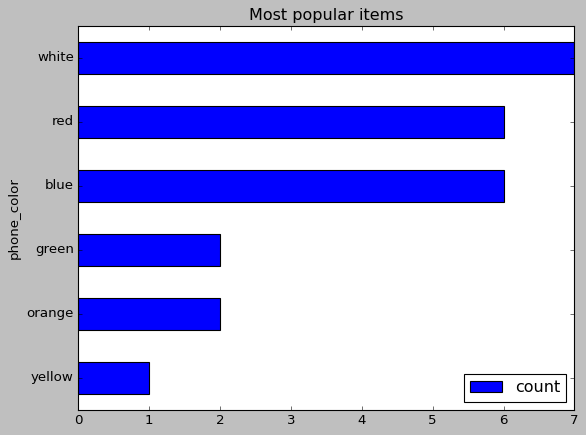

In [10]:
# Data Visulaization
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
matplotlib.style.use('classic')
ax = popular_item.plot.barh(x = 'phone_color', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [11]:
# The most popular phone model is White and second most choice is Red or blue colour model.
# The least favourite model colour is yellow.

### Apriori Algorithm

In [12]:
#Itemsets
frequent_itemsets = apriori(phone_df, min_support = 0.005 , max_len= 4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(red, white)"
7,0.090909,"(red, green)"
8,0.090909,"(red, orange)"
9,0.363636,"(red, blue)"


In [13]:
# Most frequent itemsets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
5,0.545455,(blue)
6,0.363636,"(red, white)"
9,0.363636,"(red, blue)"
12,0.363636,"(blue, white)"
2,0.181818,(green)
4,0.181818,(orange)
11,0.181818,"(orange, white)"
15,0.181818,"(red, blue, white)"


In [14]:
#Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(rules.head(20))

       antecedents     consequents  antecedent support  consequent support  \
0            (red)         (white)            0.545455            0.636364   
1          (white)           (red)            0.636364            0.545455   
2            (red)          (blue)            0.545455            0.545455   
3           (blue)           (red)            0.545455            0.545455   
4           (blue)         (white)            0.545455            0.636364   
5          (white)          (blue)            0.636364            0.545455   
6         (orange)         (white)            0.181818            0.636364   
7          (white)        (orange)            0.636364            0.181818   
8     (red, green)         (white)            0.090909            0.636364   
9     (red, white)         (green)            0.363636            0.181818   
10  (green, white)           (red)            0.090909            0.545455   
11           (red)  (green, white)            0.545455          

In [15]:
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(red),"(green, white)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
10,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
17,(white),"(red, orange)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
13,(white),"(red, green)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
14,"(red, orange)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
16,(orange),"(red, white)",0.181818,0.363636,0.090909,0.500000,1.375000,0.024793,1.272727
15,"(red, white)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


#### Handling Profusion of Rules (Duplication elimination)

In [16]:
def to_list(i):
    return (sorted(list(i)))

In [17]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0             [red, white]
1             [white, red]
2              [red, blue]
3              [blue, red]
4            [blue, white]
5            [white, blue]
6          [orange, white]
7          [white, orange]
8      [green, red, white]
9      [red, white, green]
10     [green, white, red]
11     [red, green, white]
12     [green, red, white]
13     [white, green, red]
14    [orange, red, white]
15    [red, white, orange]
16    [orange, red, white]
17    [white, orange, red]
dtype: object

In [18]:
ma_X = ma_X.apply(sorted)
ma_X

0             [red, white]
1             [red, white]
2              [blue, red]
3              [blue, red]
4            [blue, white]
5            [blue, white]
6          [orange, white]
7          [orange, white]
8      [green, red, white]
9      [green, red, white]
10     [green, red, white]
11     [green, red, white]
12     [green, red, white]
13     [green, red, white]
14    [orange, red, white]
15    [orange, red, white]
16    [orange, red, white]
17    [orange, red, white]
dtype: object

In [19]:
rules_sets = list(ma_X)
rules_sets

[['red', 'white'],
 ['red', 'white'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'white'],
 ['blue', 'white'],
 ['orange', 'white'],
 ['orange', 'white'],
 ['green', 'red', 'white'],
 ['green', 'red', 'white'],
 ['green', 'red', 'white'],
 ['green', 'red', 'white'],
 ['green', 'red', 'white'],
 ['green', 'red', 'white'],
 ['orange', 'red', 'white'],
 ['orange', 'red', 'white'],
 ['orange', 'red', 'white'],
 ['orange', 'red', 'white']]

In [20]:
# set operation to have unique elements
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['blue', 'red'],
 ['green', 'red', 'white'],
 ['orange', 'white'],
 ['orange', 'red', 'white'],
 ['blue', 'white'],
 ['red', 'white']]

In [21]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
index_rules

[2, 8, 6, 14, 4, 0]

In [22]:
# Rules without any redundancy 
rules_no_redundancy = rules.iloc[index_rules, :]
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
14,"(red, orange)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
4,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


In [23]:
# Sorted list and top 10 rules 
rules10 = rules_no_redundancy.sort_values('lift', ascending = False).head(10)

rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
14,"(red, orange)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


<AxesSubplot:xlabel='support', ylabel='confidence'>

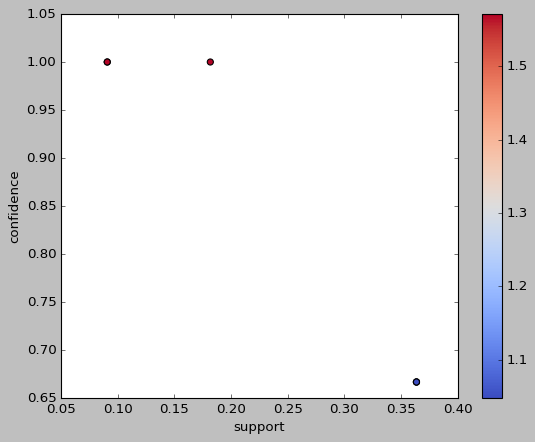

In [24]:
rules10.plot(x = "support", y = "confidence", c = rules10.lift, kind="scatter", s = 30, cmap = plt.cm.coolwarm)

In [ ]:
# Based on the association rules formed and lift ratio. We can come up with various strategies to improve sales.
# The customer who buys orange or red model is most likely to buy white model.
# As white color model is the most popular, It can be suggested to customers who previously have purchased green or red color model.
# Very few rows of data to analyze and the rules are also not very strong.(Antecedents and Consequents are not strongly dependent on each other.)
